# PROJECT 2-Customer Segmentation Analysis

# Customer Segmentation

Customer segmentation is the process by which you divide your customers up based on common characteristics – such as demographics or behaviours, so your marketing team or sales team can reach out to those customers more effectively.

# Data Collection: 

Obtain a dataset containing customer information, purchase history, and relevant data

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt  # Corrected import statement
from scipy.stats import pointbiserialr


In [5]:
#Reading the data
data=pd.read_csv("C:\\Users\\khush\\Desktop\\Data Analysts\\OASIS INFOBYTE\\Market Analysis\\ifood_df.csv")
#Taking a look at the top 5 rows of the data
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# Data Exploration and Cleaning:

Explore the dataset, understand its structure, and handle
any missing or inconsistent data.

Data exploration and cleaning are crucial steps in the data analysis process.

In [6]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [7]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [8]:
data.shape#describe the shape of datasets.

(2205, 39)

# Checking column types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

All column types look good. There is no need to change any data types.

# Looking for missing values

Surprisingly, there is no missing values in the data and there are 2,205 observations in the data frame.

In [10]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

# Checking for missing values

False indicates that the corresponding element is not missing, while True indicates that it is missing

In [11]:
missing_values=data.isnull()# Check for missing values

In [12]:
missing_values

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Get the indices where missing_values is True
missing_indices = missing_values[missing_values].stack().index

In [14]:
# Iterate through the indices and print the corresponding values
for row, col in missing_indices:
    print(f"Missing value at row {row}, column '{col}': {data.at[row, col]}")

Above analysis shows that there is no missing values.

# Dealing with Duplicates:

In [15]:
duplicates=data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
2200    False
2201     True
2202    False
2203    False
2204    False
Length: 2205, dtype: bool

If df.duplicated() returns True for a particular row, it means that the row is a duplicate of a previous row in the DataFrame. In other words, the values in that row are exactly the same as the values in another row that occurs earlier in the DataFrame.

In [16]:
# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 184


In [17]:
# Get the indices of duplicate rows
duplicate_indices = data[duplicates].index
print("Indices of duplicate rows:", duplicate_indices)

Indices of duplicate rows: Int64Index([  77,  167,  267,  268,  346,  366,  404,  426,  446,  487,
            ...
            2149, 2169, 2171, 2183, 2184, 2185, 2188, 2192, 2199, 2201],
           dtype='int64', length=184)


Above analysis shows that  there are 184 rows having duplicate values

# Drop the duplicate rows

The df.drop_duplicates() function in pandas is used to remove duplicate rows from a DataFrame. It returns a DataFrame with duplicate rows removed based on a specified subset of columns or considering all columns.

In [18]:
# Remove duplicate rows
cleaned_data = data.drop_duplicates()
cleaned_data


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [19]:
duplicates=cleaned_data.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


Now we can see that after cleaning dataset we find zero duplicate rows

In [20]:
cleaned_data.shape

(2021, 39)

# OR

# Assessing unique values

Let's check the unique values in each column. If a column has the same values then we cannot use this column in our analysis and can remove it from the data frame.

In [21]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

Columns Z_CostContact and Z_Revenue have all the same values. These columns will not help us to understand our customers better. We can drop these columns from the data frame.

In [22]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [23]:
data.shape

(2205, 37)

As In Assessing unique values we have dropped less no columns as compared to  dropping duplicates  rows.Therefore we will do our analysis on dataset having unique number of values,because it gives us more accurate  results.

# Data Exploration

Box plot for the total amount spent on all products (MntTotal)

Our analysis will be focused on total amount spent on all products (MntTotal). Boxplot will help us to find outliers if any.

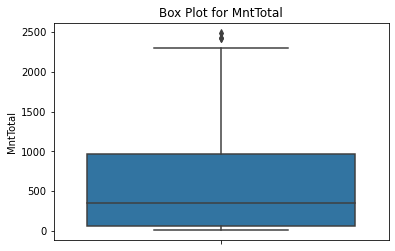

In [24]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

# Outliers

Outliers refer to data points that significantly differ from other observations in a dataset. These data points can skew statistical analyses and models, potentially leading to incorrect conclusions if not properly addressed. Identifying and handling outliers is an important step in data preprocessing and analysis.

The box plot spotted a few outliers in the MntTotal. Let's take a closer look at the outliers

In [25]:
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()#these values to be filter..

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [26]:
clipped_data = np.clip(data['MntTotal'], lower_bound, upper_bound)#Another or one of the method to remove and handle outliers.
clipped_data.describe()

count    2205.000000
mean      562.596372
std       575.402212
min         4.000000
25%        56.000000
50%       343.000000
75%       964.000000
max      2326.000000
Name: MntTotal, dtype: float64

# Handling Outliers:

 In some cases, outliers can be removed from the dataset if they are determined to be errors or anomalies.

In [26]:
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


# Box plot and histogram for income

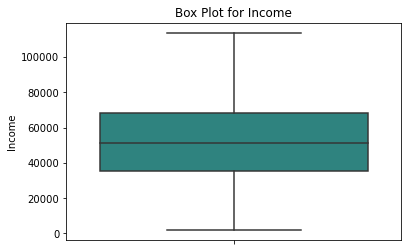

In [27]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

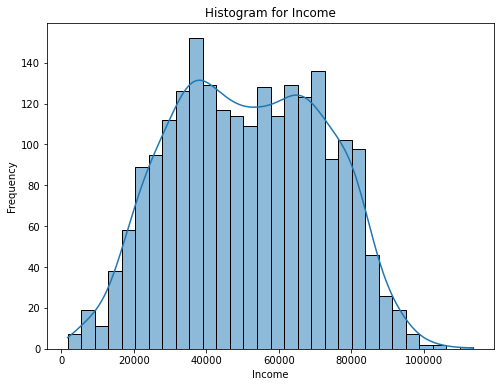

In [28]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Income distribution is close to normal distribution with no outliers

# Histogram for age

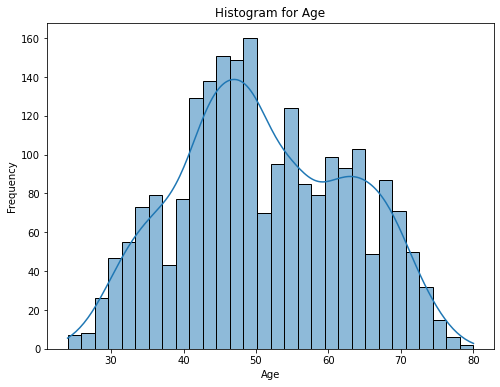

In [29]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [30]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


The age distribution looks approximately symmetrical and the left and right sides of distribution are roughly equal. Skewness of 0.09 (close to zero) supports the visual observation of the distribution. Kurtosis of -0.8 suggests that the distribution is close to normal with lighter tails and less peaked than a normal distribution.

# Correlation matrix¶

There are many columns in the data. The correlation matrix will be very crowded if we use all columns of the data frame. We will group the columns and explore correlation between columns in each group and the column 'MntTotal'. We will focus on the column 'MntTotal' to understand how we can segment the customers who buy the most in overall. We can run similar analysis for every type of product.

A correlation matrix allows you to quickly see how variables in your dataset are related to each other. By examining the correlation coefficients, you can identify which variables are positively correlated (increase or decrease together) or negatively correlated (move in opposite directions).

 Exploring the correlation matrix can provide insights into the underlying relationships within your dataset. For example, you might discover unexpected correlations that prompt further investigation or reveal interesting patterns in your data.

Overall, the correlation matrix is a powerful tool for exploring and understanding the relationships within your data, which is essential for making informed decisions in data analysis, modeling, and hypothesis generation

In [82]:
cols_demographics = ['Income','Age']#describe the study of population based on factors..
cols_children = ['Kidhome', 'Teenhome']#kids at home, teenagers at home
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']#marital status 
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']#different types of spending (e.g., wines, fruits, meat products, etc.)
cols_communication = ['Complain', 'Response', 'Customer_Days']#contains columns related to communication metrics, such as complaints, responses, and customer engagement (e.g., customer days)
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']#represent responses to different marketing campaigns (e.g., campaign acceptance rates).
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']#contain information about the source of purchases (e.g., deals, web, catalog, store visits).
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']#columns related to education levels, such as different education cycles (e.g., 2nd cycle), basic education, graduation, master's degree, and PhD.

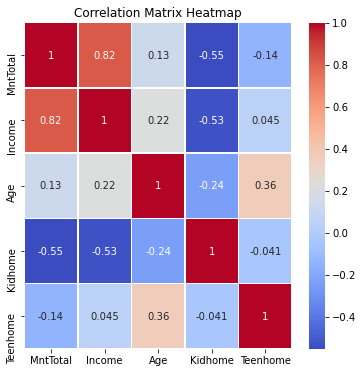

In [32]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

 MntTotal has strong positive correlation with income and intermediate negative correlation with Kidhome. Income feature has nearly the same negative correlation with Kidhome and MntTotal.

# Point-Biserial correlations for binary variables

Pearson correlation measures the strength and direction of a linear relationship between two continuous variables. We used Pearson correlation for MntTotal, Age and Income. When we try to understand the relationship between a continuous variable MntTotal and binary variables like marital status then we should use Point-Biserial Correlation Point-Biserial Correlation is used to measure the strength and direction of the linear relationship between a binary variable and a continuous variable.

The point-biserial correlation coefficient ranges from -1 to 1, where a value closer to 1 indicates a strong positive correlation between the binary variable and the continuous variable, while a value closer to -1 indicates a strong negative correlation. A value around 0 suggests little to no correlation.

In [33]:
for col in cols_marital:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

0.0053: Point-Biserial Correlation for marital_Divorced with p-value 0.8041
-0.0188: Point-Biserial Correlation for marital_Married with p-value 0.3767
0.0011: Point-Biserial Correlation for marital_Single with p-value 0.9571
0.0008: Point-Biserial Correlation for marital_Together with p-value 0.9708
0.0370: Point-Biserial Correlation for marital_Widow with p-value 0.0826


There is no strong Point-Biserial correlation between MntTotal and different marital statuses. Some feature engineering may be required during the modelling process.

In [34]:
for col in cols_education:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

-0.0593: Point-Biserial Correlation for education_2n Cycle with p-value 0.0054
-0.1389: Point-Biserial Correlation for education_Basic with p-value 0.0000
0.0159: Point-Biserial Correlation for education_Graduation with p-value 0.4551
0.0004: Point-Biserial Correlation for education_Master with p-value 0.9842
0.0737: Point-Biserial Correlation for education_PhD with p-value 0.0005


There is no strong Point-Biserial correlation between MntTotal and various education levels.




# Descriptive Statistics:

 Calculate key metrics such as average purchase value, frequency of
purchases, etc.

In [35]:
data.describe()#give all statistics value for respective column

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


In [36]:
# Calculate total purchase value
total_purchase_value = data['MntTotal'].sum()
total_purchase_value

1233547

In [37]:
# Calculate average purchase value
average_purchase_value = data['MntTotal'].mean()
average_purchase_value

560.19391462307

In [38]:
# Calculate frequency of purchases per customer
purchase_frequency =data['Customer_Days'].count().mean()
purchase_frequency

2202.0

In [39]:
Average_of_active_customer_days=data['Customer_Days'].mean()
Average_of_active_customer_days

2512.9237057220707

# K-Means Clustering

Utilize clustering algorithms (e.g., K-means) to segment
customers based on behavior and purchase patterns.


K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity. K-means clustering usually works well in practice and scales well to the large datasets.

K-means clustering algorithm is based on the calculation of distances between data points to form clusters. When features have different scales, features with larger scales can disproportionately influence the distance calculation. There are various ways to standardise features, we will use standard scaling .

In [40]:
from sklearn.cluster import KMeans

# Standardising data

Standardising data-standardizes features by removing the mean and scaling them to unit variance and It transforms the data such that it has a mean of 0 and a standard deviation of 1.

An example illustrated why we need to standardising data .
Example:
Handling Different Scales: Features in a dataset may have different scales. For example, in a dataset containing both income and age, income might be in the range of thousands while age is typically in the range of tens. If the scales of features are not consistent, some algorithms may give more weight to features with larger scales. Standard scaling brings all features to the same scale, mitigating this issue.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Initialize StandardScaler
cols_for_clustering = ['Income', 'MntTotal']#list of column we want to scale
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])# Fit and transform the data
data_scaled[cols_for_clustering].describe()

,Income,MntTotal
count,2.202000e+03,2.202000e+03
mean,2.287125e-17,-9.246817e-17
std,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01
25%,-7.926475e-01,-8.815089e-01
50%,-1.508040e-02,-3.806058e-01
75%,8.017617e-01,7.024988e-01
max,3.006747e+00,3.048788e+00


One more method for Perform feature scaling or normalization if required using functions like sklearn

MinMaxScaler:

MinMaxScaler scales features to a given range, usually [0, 1] by default.
It transforms the data such that the minimum value of each feature becomes 0, and the maximum value becomes 1.''

The mean value for all colums is almost zero and the standard deviation is almost 1. All the data points were replaced by their z-scores.

# Principal Component Analysis (PCA)

PCA is a technique of dimensionality reduction. PCA takes the original features (dimensions) and create new features that capture the most variance of the data.

In [60]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

# Elbow method

The elbow method is a technique used to determine the optimal number of clusters (K) for K-means clustering algorithm.

In [65]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

X=data_Scaled[cols_for_clustering]This line extracts the subset of columns specified by 'cols-for_clustering'from scaled data and assign it to variable X.


inertia_list = []: This initializes an empty list named inertia_list where you'll store the inertia values for each number of clusters.


The loop for K in range(2,10): iterates over the range from 2 to 9 (inclusive), which represents the number of clusters you want to try.

Inside the loop, inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_ performs k-means clustering with K clusters on the dataset X.

The .fit(X) method fits the k-means model to the data.

inertia_ returns the sum of squared distances of samples to their closest cluster center, which is the inertia.

This inertia value is then appended to the inertia_list.

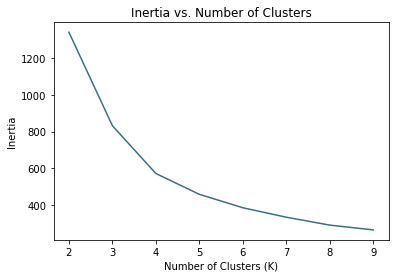

In [66]:
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Elbow method suggests 3 or 4 clusters. Let's check silhouette score.

# Silhouette score analysis

Silhouette score is a metric that used to assess the quality of clustering. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined.

The silhouette score ranges from -1 to 1, where:

A score close to +1 indicates that the sample is far away from the neighboring clusters, meaning it is well within its own cluster and far from neighboring clusters.

A score of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.

A score close to -1 indicates that the sample is much closer to a neighboring cluster than to its own cluster, suggesting it may have been assigned to the wrong cluster.

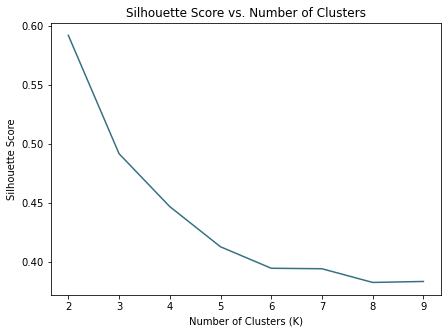

In [67]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

The highest silhouette score is for 2 clusters.

In [59]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

# Visualisation of clusters

Create visualizations (e.g., scatter plots, bar charts) to illustrate customer
segments.


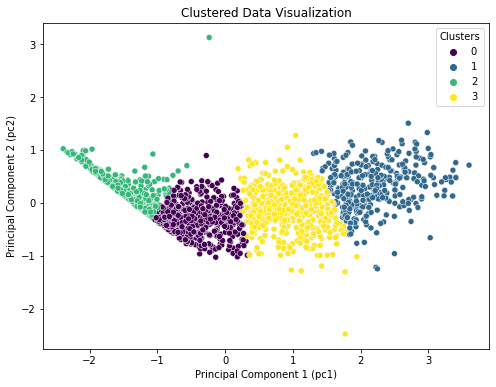

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [69]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal
Cluster,,
0,49326.797468,260.064873
1,79121.816619,1575.355301
2,27559.293179,64.612482
3,67258.197368,892.610902


# Mean consumption of different product types by cluster

In [71]:
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,260.064873,225.412975,164.115506,10.832278,58.727848,15.439873,10.949367,34.651899
1,1,1575.355301,1499.094556,814.810888,68.492837,525.137536,97.143266,69.770774,76.260745
2,2,64.612482,48.433962,24.419448,5.113208,22.217707,7.640058,5.222061,16.178520
3,3,892.610902,822.575188,501.140977,44.236842,237.163534,63.990602,46.078947,70.035714


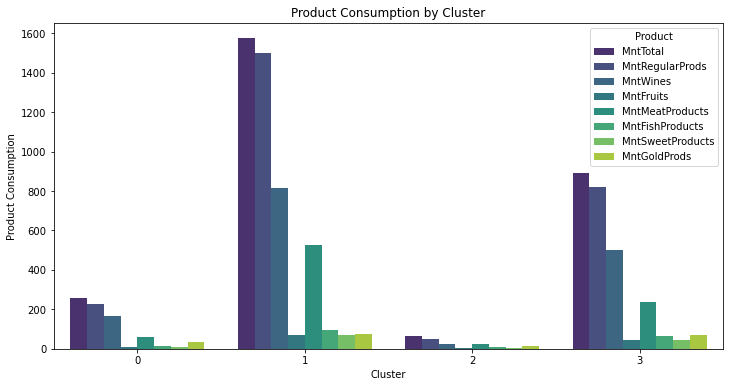

In [72]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

# Cluster sizes

Text(0, 0.5, 'MntTotal')

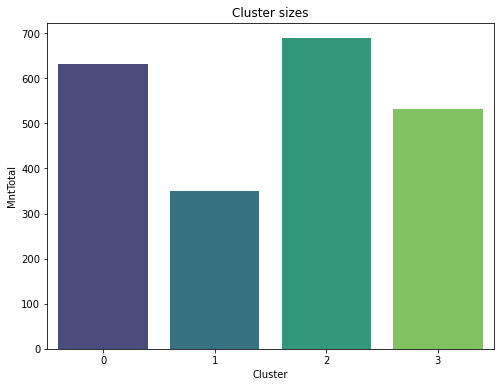

In [73]:
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [74]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,632,29.0
1,1,349,16.0
2,2,689,31.0
3,3,532,24.0


# Income by cluster

Box plot

No handles with labels found to put in legend.


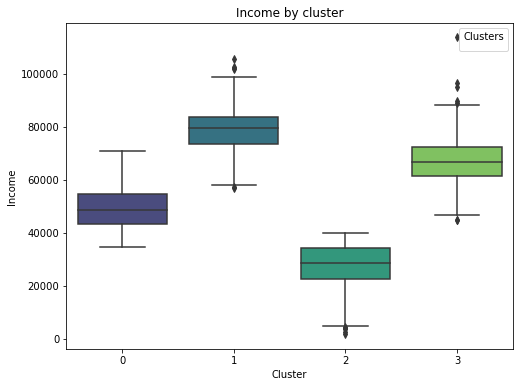

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

# Scatter plot

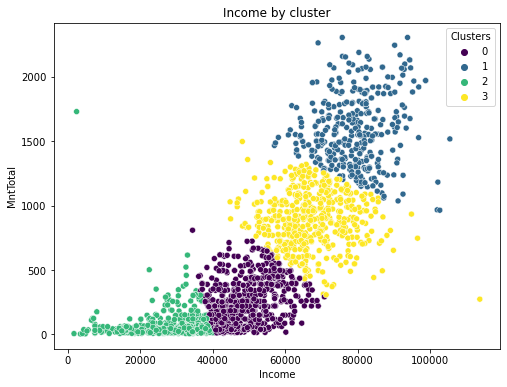

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

Text(0, 0.5, 'MntTotal')

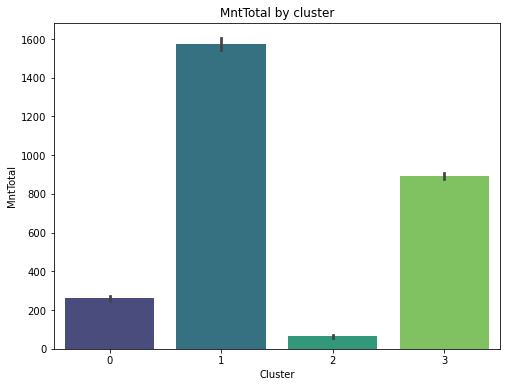

In [94]:
#Income-Customer's  Yearly household Income
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by cluster')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

Text(0, 0.5, 'MntTotal')

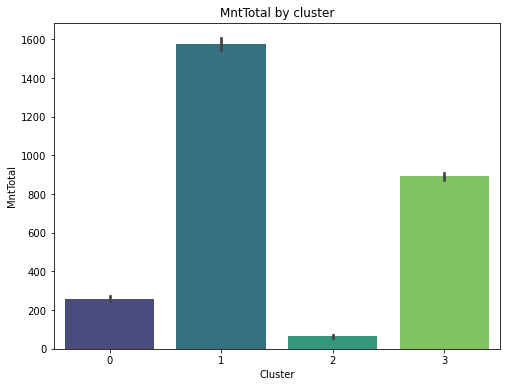

In [92]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by cluster')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

Text(0, 0.5, 'Complain')

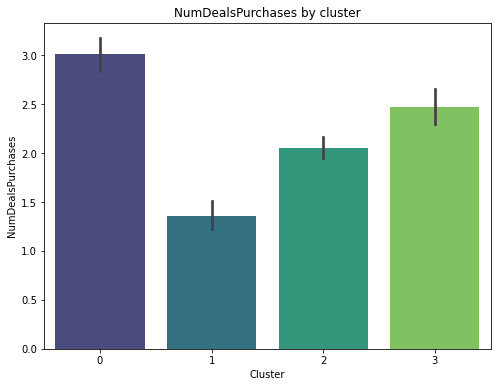

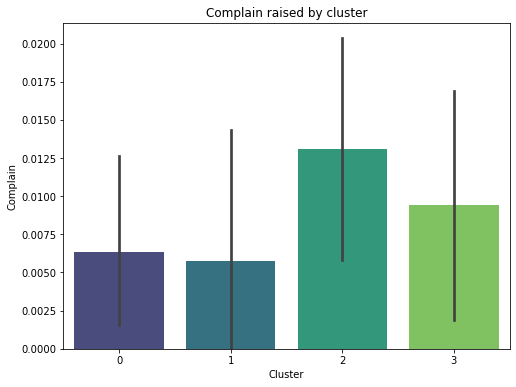

In [90]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='NumDealsPurchases', data=data, palette='viridis')
plt.title('NumDealsPurchases by cluster')
plt.xlabel('Cluster')
plt.ylabel('NumDealsPurchases')

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Complain', data=data, palette='viridis')
plt.title('Complain raised by cluster')
plt.xlabel('Cluster')
plt.ylabel('Complain')

# Insights and Recommendations:

Analyze characteristics of each segment and provide
insights.

Based on the clusters, tailored marketing strategies can be created. Customers from these segments will have different interests and product preferences.

# Marketing Conclusion based on above analysis and visualisation

Cluster 1:This cluster produces highest amount of MntTotal...

cluster-2:This provides minimum amount of MntTotal....

cluster 0:Maximum number of deals purchased belongs to this cluster.

cluster 2:Customer from cluster 2 have minimum number of deals purchased.

cluster1:Minimum no of complain come from cluster 1.

Cluster1 -In this cluster customers have maximum income(they are rich)

cluster 2-In this cluster customers have minimum Income.

# Recommendations

Insights can guide marketers in tailoring their strategies to effectively engage with customers in each segment, optimize marketing spend, and drive revenue growth.

Cluster 1: High-MntTotal, Low-Complaint Customers and Customers belong to this cluster have high value of income.

While customers in this cluster have lower incomes and make fewer purchases, they still represent a segment that can be targeted effectively. Marketers could focus on value propositions, affordability, and practical benefits to resonate with this audience. Campaigns highlighting cost-effectiveness, discounts, and budget-friendly options may attract their attention.
    


Cluster 2: Low-MntTotal, Low-Deals Purchased Customers and most of customers belong to this cluster have low income

While customers in this cluster have lower incomes and make fewer purchases, they still represent a segment that can be targeted effectively. Marketers could focus on value propositions, affordability, and practical benefits to resonate with this audience. Campaigns highlighting cost-effectiveness, discounts, and budget-friendly options may attract their attention.

Cluster 0: Maximum Deals Purchased Customer.

Cluster 0: Since this cluster purchases the maximum number of deals, marketers should focus on maintaining customer loyalty and encouraging repeat purchases. Strategies could include loyalty programs, personalized offers, and targeted promotions to capitalize on their willingness to purchase.